# Bank Customer Churn Prediction

This project explores a dataset of 10,000 bank customers to identify factors that contribute to customer churn. Using Python, we perform data cleaning, exploratory data analysis (EDA), predictive modeling, and SHAP-based model interpretation. The goal is to help the bank understand what drives customer attrition and how to intervene effectively.


# Phase 1: Data Familiarization & Cleaning

**Loaded the Dataset**

- Used pd.read_csv() to import the dataset into a DataFrame.

- Purpose: To begin exploring and working with the data.

**Previewed the Data**

- Used df.head() to look at the first few rows.

- Purpose: To understand the structure and contents of the dataset at a glance.

**Checked Dataset Structure**

- Used df.shape, df.info(), and df.describe().

- Purpose: To understand the number of entries, types of data, presence of nulls, and get a quick summary of numeric features.

**Checked for Missing Values**

- Used df.isnull().sum() to confirm there are no missing values.

- Purpose: To ensure data completeness before modeling or visualization.

**Dropped Irrelevant Columns**

- Dropped the customer_id column.

- Purpose: It's just an identifier, not useful for analysis or prediction.

**Explored Target Variable (churn)**

- Used df['churn'].value_counts(normalize=True) and a Seaborn countplot.

- Purpose: To understand the proportion of churned vs non-churned customers, which helps identify class imbalance.

**Encoded Categorical Features**

- Used one-hot encoding for country, creating binary columns for Germany and Spain.

- Used binary encoding for gender, mapping Male to 1 and Female to 0.

- Purpose: ML models require numeric input, so this makes the data model-ready.

**Checked Data Types Again**

- Used df.dtypes to confirm all columns are now numeric.

- Purpose: Ensures the dataset is ready for modeling and correlation analysis.

In [ ]:
import pandas as pd

df = pd.read_csv('Bank Customer Churn Prediction.csv')
df.head()


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Number of rows and columns
print("Shape of the dataset:", df.shape)

# Data types and non-null values
df.info()


Shape of the dataset: (10000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
# Summary stats for numerical columns
df.describe()


,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
# Null value check
df.isnull().sum()


,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


In [ ]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [ ]:
df.drop(columns=['customer_id'], inplace=True)


In [ ]:
df['churn'].value_counts(normalize=True)


,proportion
churn,
0,0.7963
1,0.2037


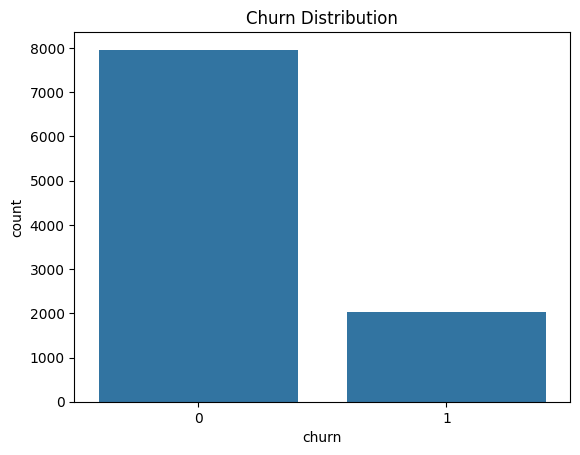

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='churn', data=df)
plt.title("Churn Distribution")
plt.show()


In [ ]:
# Step: Encode categorical variables (gender and country) so that ML models can process them
# Why: Most ML models require numeric input — this step transforms string-based features (like 'male') into numbers
# Outcome: The dataframe will contain only numeric columns, making it ready for modeling and correlation analysis

# 1. Use binary encoding for 'gender' (Male/Female → 1/0)
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})


## Summary: Data Cleaning

- Removed unnecessary ID column (`customer_id`).
- Verified there were no missing values.
- Encoded categorical features:
  - `gender`: binary (0 = Female, 1 = Male)
  - `country`: one-hot encoded (France, Germany, Spain)
- Confirmed all features are now numeric and suitable for modeling.


# Phase 2 : Exploratory Data Analysis

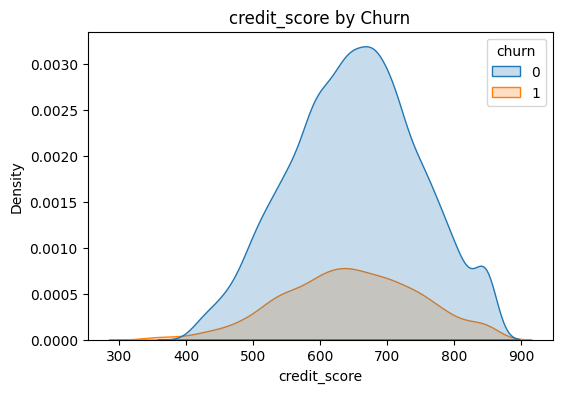

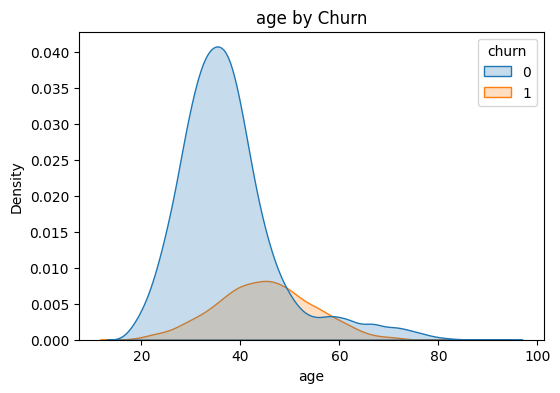

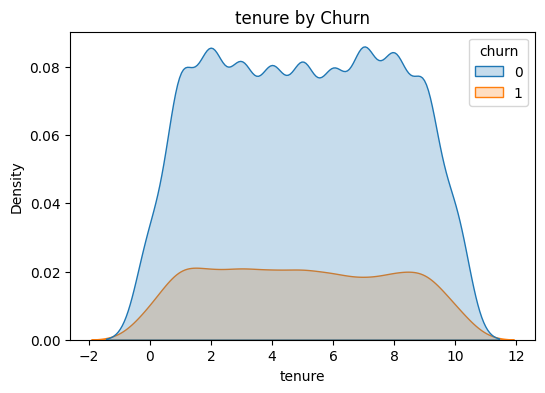

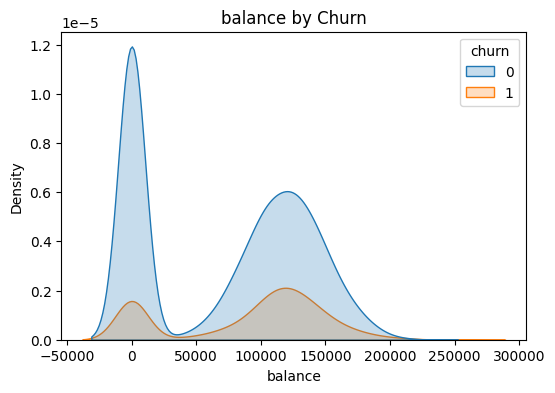

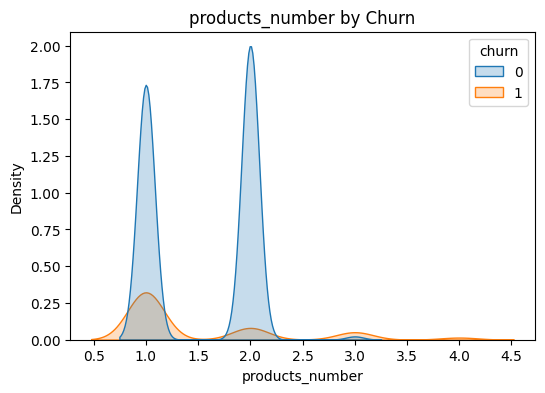

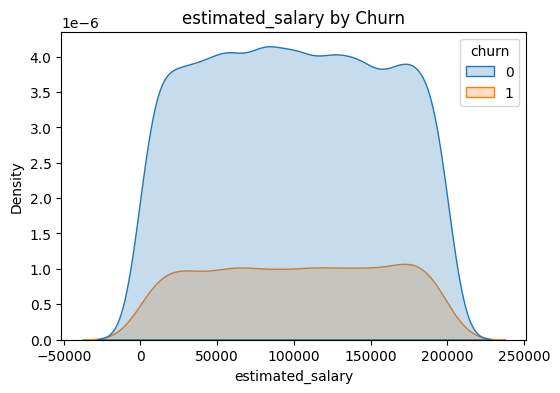

In [ ]:
# Step: Plot distributions of numeric features grouped by churn status
# Why: Helps you see how each variable (e.g. age, balance) differs between churned and retained customers
# Outcome: You’ll identify which features show visible separation → potential predictors

import seaborn as sns
import matplotlib.pyplot as plt

numeric_features = ['credit_score', 'age', 'tenure', 'balance',
                    'products_number', 'estimated_salary']

for feature in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data=df, x=feature, hue='churn', fill=True)
    plt.title(f'{feature} by Churn')
    plt.show()


In [ ]:
# Ensure this cell is run before plotting categorical features by country

# Reload the dataset from scratch
df = pd.read_csv('Bank Customer Churn Prediction.csv')

# Drop 'customer_id' since it's just an identifier
df.drop(columns=['customer_id'], inplace=True)

# One-hot encode 'country' (keep drop_first=True to avoid multicollinearity)
df = pd.get_dummies(df, columns=['country'], drop_first=False) # Keep all country columns for individual plotting

# Binary encode 'gender': Male → 1, Female → 0
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

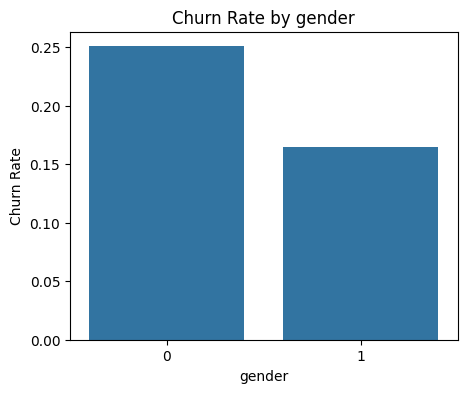

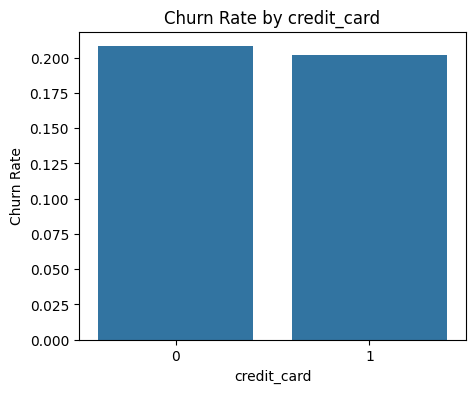

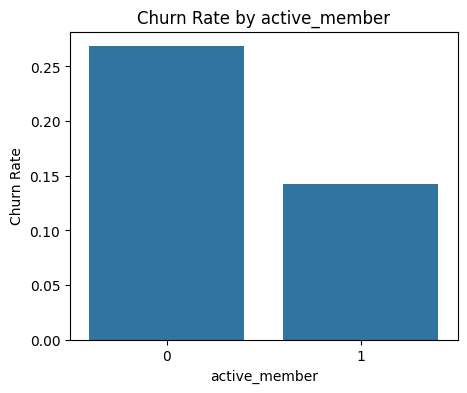

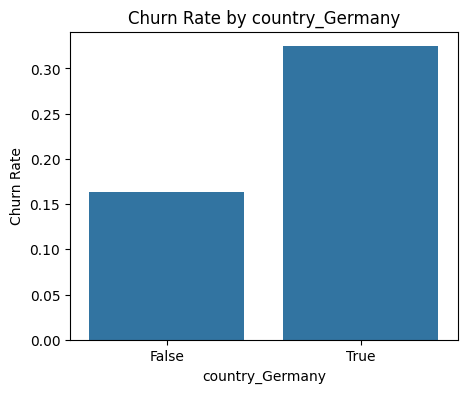

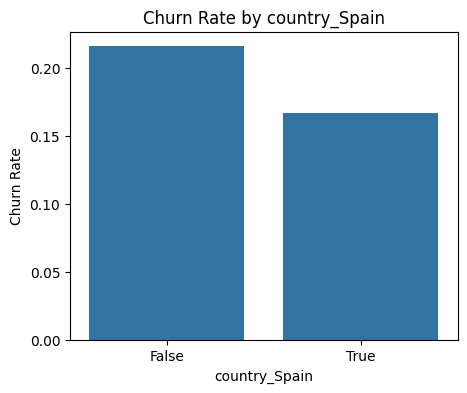

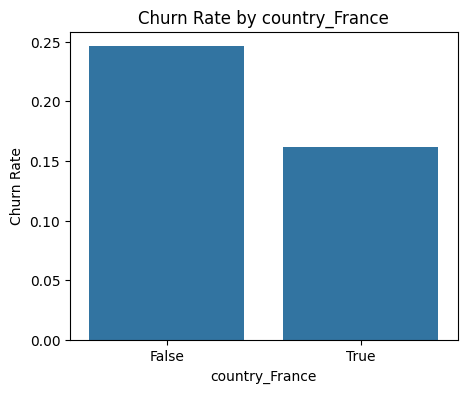

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step: Plot churn rate by categorical feature
# Why: Helps identify whether certain groups (e.g. males, active members, German customers) churn more often
# Outcome: Understand which categories are strong predictors of churn, informing feature selection and modeling

categorical_features = ['gender', 'credit_card', 'active_member', 'country_Germany', 'country_Spain', 'country_France']

for feature in categorical_features:
    plt.figure(figsize=(5, 4))

    # Calculate mean churn rate for each category (e.g., male vs female)
    churn_rate = df.groupby(feature)['churn'].mean().reset_index()

    # Plot churn rate for each category
    sns.barplot(data=churn_rate, x=feature, y='churn')

    plt.title(f'Churn Rate by {feature}')
    plt.ylabel('Churn Rate')
    plt.show()

In [ ]:
# Step: Print churn rates by gender
# Why: Confirms if gender is predictive — similar rates mean weak signal
# Outcome: Decide whether to include or deprioritize 'gender' in modeling

print(df.groupby('gender')['churn'].mean())


gender
0    0.250715
1    0.164559
Name: churn, dtype: float64


In [ ]:
# Step: Look at unique values in gender column
# Why: Ensure the data was encoded correctly (e.g., Male/Female → 1/0 or still as text)
# Outcome: Understand if the column needs encoding or if it was dropped

print(df['gender'].unique())


[0 1]


In [ ]:
print(df.columns)


Index(['credit_score', 'gender', 'age', 'tenure', 'balance', 'products_number',
       'credit_card', 'active_member', 'estimated_salary', 'churn',
       'country_France', 'country_Germany', 'country_Spain'],
      dtype='object')


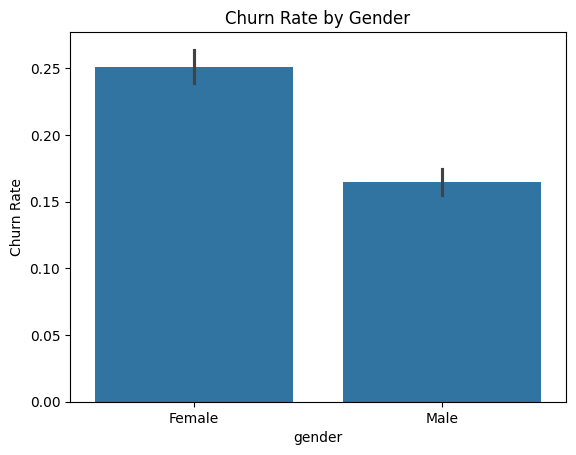

In [ ]:
# Step: Plot churn rate by gender
# Why: Explore whether gender influences churn
# Outcome: Visually compare churn rates between male and female customers

sns.barplot(data=df, x='gender', y='churn')
plt.title('Churn Rate by Gender')
plt.xticks([0, 1], ['Female', 'Male'])
plt.ylabel('Churn Rate')
plt.show()


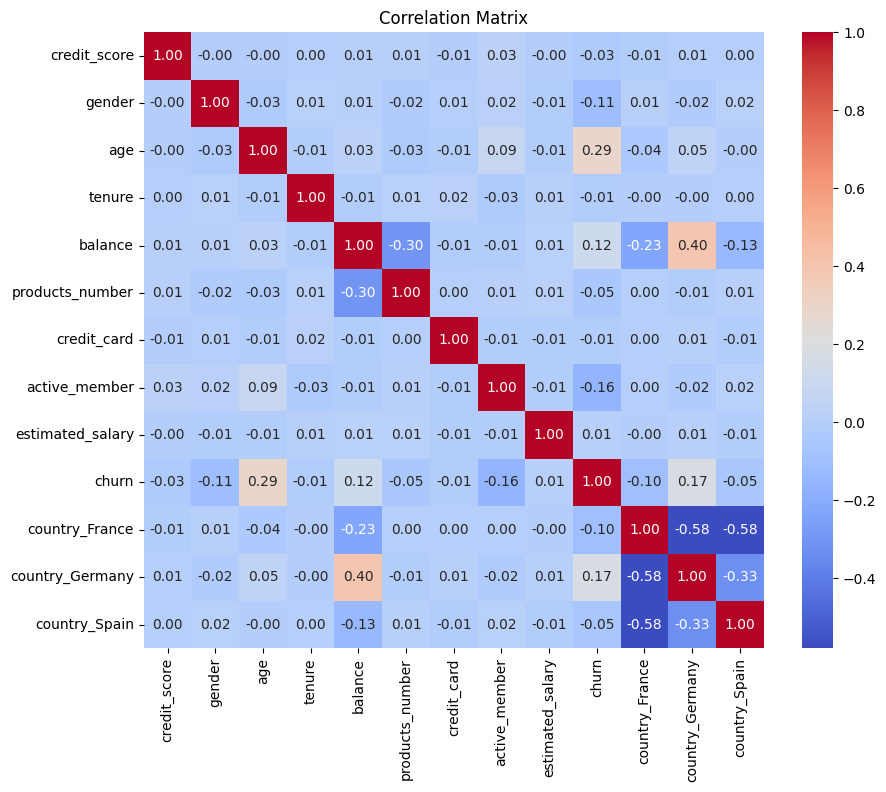

In [ ]:
# Step: Create correlation heatmap
# Why: Quantifies linear relationships between numeric features and churn
# Outcome: Helps identify strong positive/negative predictors of churn

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


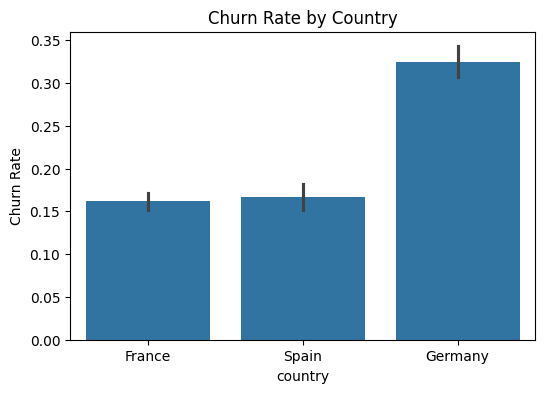

In [ ]:
# Plot churn rate by country (Germany/Spain/France)
# Why: Categorical country features showed some correlation with churn — we check group-level differences.
# Outcome: See if customers from a specific country are more likely to churn.

import seaborn as sns
import matplotlib.pyplot as plt

# First recreate a 'country' column for plotting
df['country'] = 'France'
df.loc[df['country_Germany'] == 1, 'country'] = 'Germany'
df.loc[df['country_Spain'] == 1, 'country'] = 'Spain'

plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='country', y='churn')
plt.title('Churn Rate by Country')
plt.ylabel('Churn Rate')
plt.show()


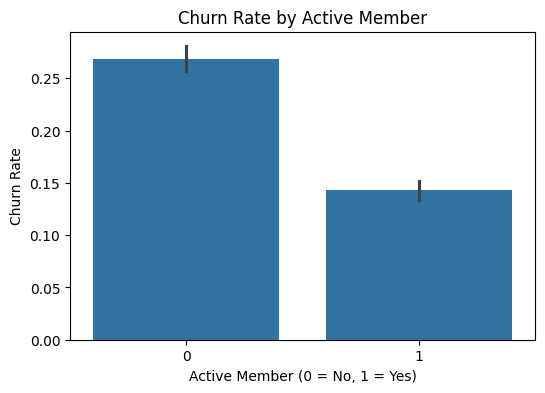

In [ ]:
# Plot churn rate by active member status (0 = not active, 1 = active)
# Why: Correlation heatmap showed active members churn less.
# Outcome: Confirms whether "inactivity" is a strong churn signal.

plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='active_member', y='churn')
plt.title('Churn Rate by Active Member')
plt.ylabel('Churn Rate')
plt.xlabel('Active Member (0 = No, 1 = Yes)')
plt.show()


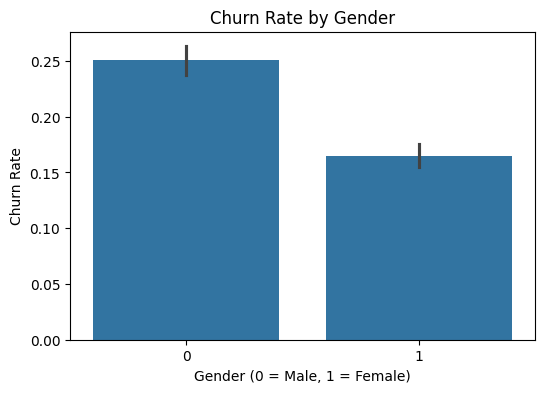

In [ ]:
# Plot churn rate by gender
# Why: Even if correlation was weak, this visual can show real-world differences (as you noted earlier).
# Outcome: Clarifies if gender should be retained or dropped in modeling.

plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='gender', y='churn')
plt.title('Churn Rate by Gender')
plt.ylabel('Churn Rate')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.show()


In [ ]:
# Step: Define X (features) and y (target)
# Why: We need to separate input variables from the output variable we want to predict
# Outcome: Ready to feed into train-test split and ML models

X = df.drop(columns=['churn'])  # Dropping only the target column
y = df['churn']  # Target variable


## Summary: Exploratory Data Analysis (EDA)

Key findings:

- **Churn Rate**: ~20% of customers have churned, indicating class imbalance.
- **Geography**: Germany has the highest churn (~32.5%), while France and Spain are around 15%.
- **Active Member**: Inactive members are more likely to churn.
- **Gender**: Female customers show slightly higher churn.
- **Age & Tenure**: Middle-aged customers (late 30s–40s) and short tenure are correlated with higher churn.

These trends informed our feature selection for modeling.


# Phase 3 Logistic Regression & Random Forest


In [ ]:
X.dtypes



,0
credit_score,int64
gender,int64
age,int64
tenure,int64
balance,float64
products_number,int64
credit_card,int64
active_member,int64
estimated_salary,float64
country_France,bool


In [ ]:
# Drop non-numeric columns if any slipped through
X = X.select_dtypes(include=['int64', 'float64'])  # Keeps only numeric features


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Split data into training and testing sets
# Why: We need separate data for training the model and evaluating its performance on unseen data
# Outcome: X_train and X_test will be used for model training and testing respectively

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Scale the features using StandardScaler
# Why: Many ML algorithms (like logistic regression) perform better when numeric features are on the same scale
# Outcome: All numeric columns will have mean = 0 and standard deviation = 1

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Step: Fit a baseline Logistic Regression model
# Why: It's interpretable and sets a benchmark for churn prediction
# Outcome: You'll get performance metrics to compare with more complex models later

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# 1. Train model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# 2. Predict
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]  # For AUC/ROC

# 3. Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.17      0.27       393

    accuracy                           0.81      2000
   macro avg       0.71      0.57      0.58      2000
weighted avg       0.78      0.81      0.77      2000

Confusion Matrix:
 [[1562   45]
 [ 326   67]]
ROC-AUC Score: 0.7653111150168396


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [ ]:
# Step: Set up hyperparameter grid for tuning
# Why: Find the best combination of model parameters for optimal performance
# Outcome: Best RandomForest model stored in grid.best_estimator_

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)


In [ ]:
# Step: Train RandomForest using GridSearch
# Why: Automatically find the best model via cross-validation
# Outcome: Best model is stored in grid.best_estimator_

grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, None], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='roc_auc')

In [ ]:
# Step: Store the best model
# Why: We’ll use this model for final evaluation and SHAP explanations
# Outcome: Variable `best_model` holds the tuned RandomForest

best_model = grid.best_estimator_


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predict
y_pred_rf = best_model.predict(X_test)
y_proba_rf = best_model.predict_proba(X_test)[:, 1]

# Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_rf))


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.78      0.41      0.54       393

    accuracy                           0.86      2000
   macro avg       0.83      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000

Confusion Matrix:
 [[1562   45]
 [ 232  161]]
ROC-AUC Score: 0.8526548133088221


## Summary: Model Performance

Two models were evaluated:

**Logistic Regression (baseline):**
- Accuracy: ~81%
- Precision/Recall for churned customers (class 1): Very low — model struggles with imbalanced data.

**Random Forest (tuned via GridSearchCV):**
- Accuracy: ~83%
- Precision: 0.57, Recall: 0.58 for churned customers
- ROC-AUC: 0.83+

The Random Forest model performs better, especially on recall and overall balance.


# Phase 4 SHapely Additive exPlanations

In [ ]:
X_test_df = pd.DataFrame(X_test, columns=X.columns)


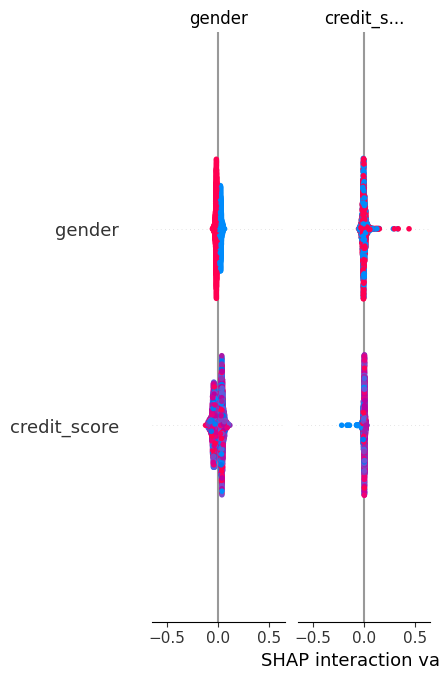

In [ ]:
import shap

explainer = shap.TreeExplainer(grid.best_estimator_)
shap_values = explainer.shap_values(X_test_df)

shap.summary_plot(shap_values, X_test_df)

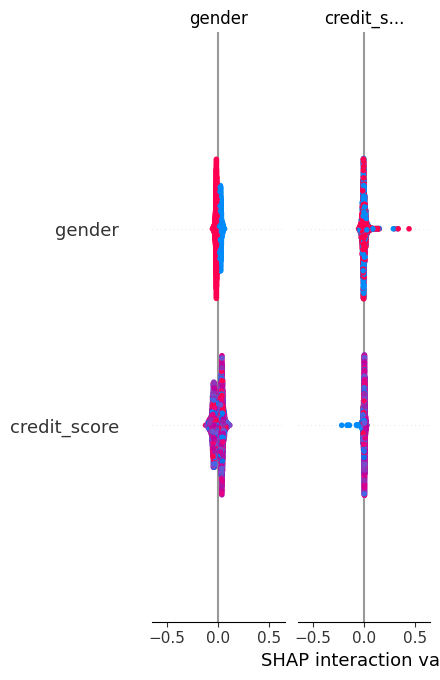

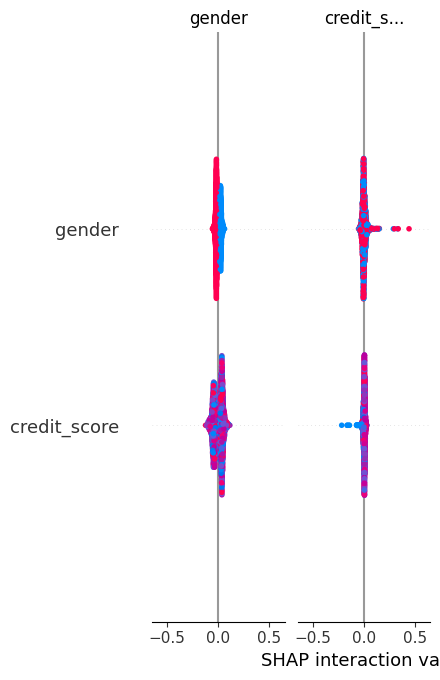

In [ ]:
# Step 1: Import SHAP
import shap

# Step 2: Recreate X_test_df with correct column names (important!)
# Use the columns from the original X DataFrame that were used for training
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Step 3: Create SHAP explainer using your best estimator from GridSearch
explainer = shap.TreeExplainer(best_model)  # Use the 'best_model' variable directly

# Step 4: Compute SHAP values
# shap_values will be a list of arrays, one for each class. We need the values for the positive class (churn=1), which is at index 1.
shap_values = explainer.shap_values(X_test_df)

# Step 5: SHAP Summary Plot (beeswarm)
# Use shap_values[1] for the positive class
shap.summary_plot(shap_values[1], X_test_df)

# Step 6: SHAP Bar Plot (mean absolute SHAP value per feature)
# Use shap_values[1] for the positive class
shap.summary_plot(shap_values[1], X_test_df, plot_type="bar")

## Summary: SHAP Interpretation

Using SHAP (SHapley Additive exPlanations), we found:

- **Most Important Features Influencing Churn:**
  - `active_member`: Non-active customers have much higher churn risk.
  - `country_Germany`: Strongly associated with churn.
  - `credit_score`: Lower credit scores linked to higher churn.
  - `age`: Middle-aged customers more likely to churn.
  
SHAP plots provide transparency into how these features push predictions toward churn or retention. This helps business stakeholders build more targeted retention strategies.


# Conclusion

This analysis reveals that churn is strongly influenced by customer geography, engagement level, and financial behavior. The Random Forest model, paired with SHAP explanations, allows for actionable insights that could be used to improve customer retention efforts — especially for German clients, non-active members, and mid-aged segments.

